<h2>Карьерные возможности в Data Science</h2>

<h3> Описание проекта</h3>

Набор данных содержит информацию по заработной плате специалистов в области Data Science (далее DS). Кроме того представлена информация по профессиональному уровню (EN - начинающих специалист, MI - средний уровень, SE - старший специалист) и размеру компании (S - менее 50 сотрудников, M - от 50 до 250 сотрудников,L - более 250). 

Исследование рынка труда позволяет оценить конкурентоспособность предложений для работодателей и рекрутеров, а также возможности карьерного роста для самих специалистов, например, повышение уровня профессионального образования для возможности работы в более крупной компании или выбор наиболее востребованной специальности.

<h3> Описанние данных </h3>

<b>work_year</b> -  год, когда была выплачена зарплата.
<b>experience_level</b> - профессиогальный уровень: EN начальный уровень, MI средний уровень, SE, эксперт EX.
<b>employment_type</b> - тип занятости для данной роли: PT Part-time, FT Full-time, CT Contract, FL Freelance.
<b>job_title</b> - специальность.
<b>salary </b>- общая сумма выплаченной зарплаты брутто.
<b>salary_currency</b> - валюта выплаченной зарплаты в виде кода валюты ISO 4217.
<b>salary_in_usd</b> - заработная плата в долларах США.
<b>employee_residence </b>- основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
<b>remote_ratio</b> - коэффициент_удаленности, общий объем работы, выполняемой удаленно.
<b>company_location</b> - страна, в которой находится главный офис работодателя или его филиал по контракту, в виде кода страны ISO 3166.
<b>company_size</b> -  cреднее количество человек, работавших в компании в течение года: S менее 50 сотрудников (малая) M от 50 до 250 сотрудников (средняя) L более 250 сотрудников (большая)

Данные взяты с сайта Kaggle из заранее скачанного файла "salaries.csv" (ссылка на датасет https://www.kaggle.com/datasets/abhinavshaw09/data-science-job-salaries-2024). Используемые инструменты: Python3, Pandas, NumPy, Matplotlib, Seaborn, SciPy.

<h3> Основные вопросы </h3>

1. Какие профессии наиболее популярны?
2. Какова средняя зарплата специалиста DS?
3. Каково соотношение специалистов разного професcионального уровня?
4. Зависит ли уровень заработной платы от размера компании по количеству сотрудников?

<h3> Выводы </h3>

1. Самыми частыми профессиями являются DataEngineer, DataScience, DataAnalyst. При этом названия других специальностей перекликается с ними.
2. Средняя заработная плата DataEngineer и DataScience примерны равны, при этом з.п. DataAnalyst несколько ниже (но того же порядка).
3. В небольших компаниях соотношение специалистов разного уровня примерно равно. Преобладание уровня senior в средних и крупных компаниях.
4. Уровень з.п. в компаниях разного по количеству сотрудников размера отличался. Наиболее высокие зарплаты у специалистов крупных и средних компаний.

<h3> Подготовка </h3>


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set();
from scipy.stats import f_oneway

<h3> Обзор данных </h3>

In [6]:
df = pd.read_csv('salaries.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
work_year,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024
experience_level,SE,SE,SE,SE,SE,MI,MI,SE,SE,SE
employment_type,FT,FT,FT,FT,FT,FT,FT,FT,FT,FT
job_title,AI Engineer,Machine Learning Engineer,Machine Learning Engineer,Machine Learning Engineer,Machine Learning Engineer,Business Intelligence Developer,Business Intelligence Developer,Data Engineer,Data Engineer,Data Scientist
salary,90000,180500,96200,235000,175000,95413,70692,110000,48000,222300
salary_currency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
salary_in_usd,90000,180500,96200,235000,175000,95413,70692,110000,48000,222300
employee_residence,AE,US,US,AU,AU,US,US,UA,UA,US
remote_ratio,0,0,0,0,0,100,100,0,0,0
company_location,AE,US,US,AU,AU,US,US,UA,UA,US


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h3>1. Самые популярные професии: DataEngineer, DataScience, DataAnalyst</h3>

In [11]:
top10 = df['job_title'].value_counts()[:10]
print(top10)

job_title
Data Engineer                     3017
Data Scientist                    2874
Data Analyst                      2079
Machine Learning Engineer         1466
Research Scientist                 441
Analytics Engineer                 387
Applied Scientist                  367
Data Architect                     337
Research Engineer                  260
Business Intelligence Engineer     216
Name: count, dtype: int64


In [15]:
top10_24 = []
topJobs = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist','Analytics Engineer', 'Applied Scientist', 'Data Architect', 'Research Engineer', 'Business Intelligence Engineer']
for s in topJobs:
    top10_24.append(len(dfc))
  
print(top10_24)

[627, 698, 516, 370, 128, 109, 69, 88, 88, 52]


<h4> В 2024 году первые места так же занимают DataEngineer, DataScience, DataAnalyst.</h4>

<h3>2. Основные статистические показатели: максимальная, минимальная, средняя з.п., медиана. </h3>
    <h3> Распределение зарплат</h3>

In [17]:
round(df.agg({'salary_in_usd': ['max', 'min', 'mean', 'median']}), 2)

,salary_in_usd
max,800000.00
min,15000.00
mean,150028.81
median,141600.00


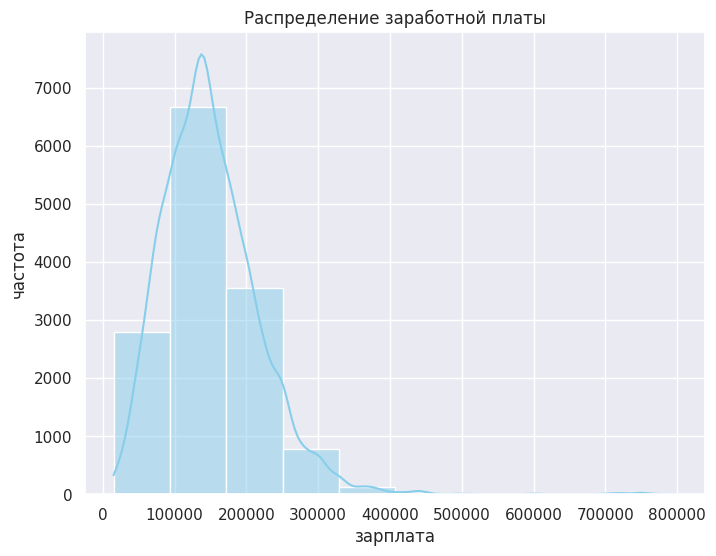

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], bins=10, kde=True, color='skyblue')
plt.title('Распределение заработной платы')
plt.xlabel('зарплата')
plt.ylabel('частота')
plt.show()

<h3>3. Каково соотношение специалистов разного профессионального уровня?</h3>

In [78]:
smallDF = df.loc[df['company_size'] == "S"]['salary_in_usd']
medDF = df.loc[df['company_size'] == "M"]['salary_in_usd']
largeDF = df.loc[df['company_size'] == "L"]['salary_in_usd']

labels = ['EN', 'MI', 'SE']

S = []
M = []
L = []
for i in labels:
    S.append(len(smallDF.loc[df['experience_level'] == i]))
for i in labels:
    M.append(len(medDF.loc[df['experience_level'] == i]))
for i in labels:
    L.append(len(largeDF.loc[df['experience_level'] == i]))

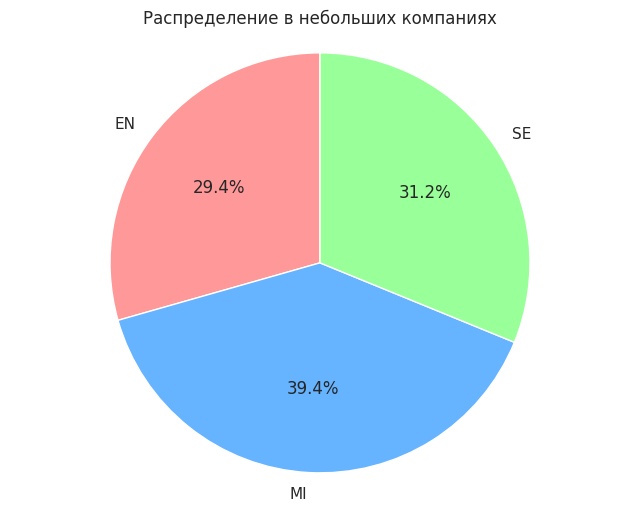

In [79]:
plt.figure(figsize=(8, 6))
plt.pie(S, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Распределение в небольших компаниях')
plt.axis('equal')

plt.show()

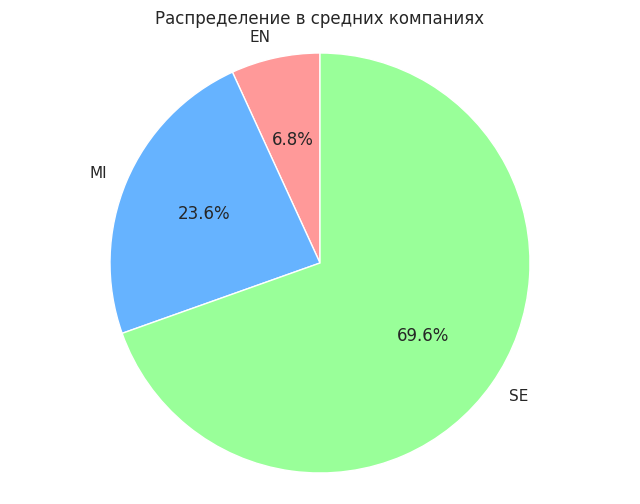

In [75]:
plt.figure(figsize=(8, 6))
plt.pie(M, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Распределение в средних компаниях')
plt.axis('equal')

plt.show()

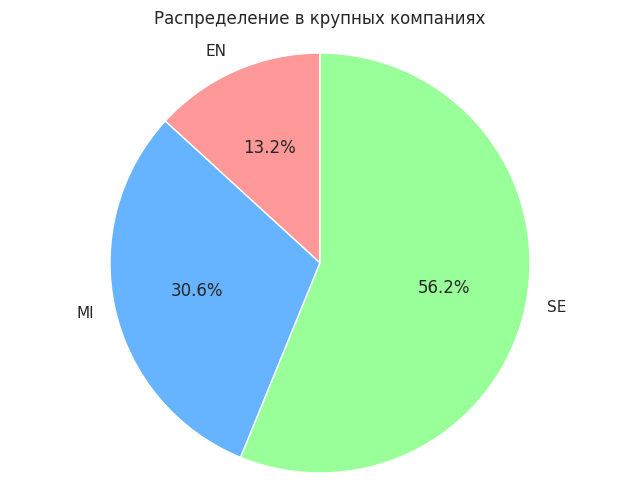

In [76]:
plt.figure(figsize=(8, 6))
plt.pie(L, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Распределение в крупных компаниях')
plt.axis('equal')

plt.show()

<h3> 4. Уровень заработной платы в разных компаниях</h3>

<h4>H0: Заработная плата сотрудников не зависит от размера компании</h4>

<h4>H1: Уровень заработной платы отличается в компаниях разного размера</h4>

Воспользуемся модулем scipy.stats.f_oneway так как сравниваем три возможных варианта (небольшая компания, средняя и крупная) и хотим избежать проблемы множественных сравнений. Примем уровень значимости (alpha) = 0.05.

In [80]:
smallDF = df.loc[df['company_size'] == "S"]['salary_in_usd']
medDF = df.loc[df['company_size'] == "M"]['salary_in_usd']
largeDF = df.loc[df['company_size'] == "L"]['salary_in_usd']

alpha = 0.05 
p_value = f_oneway(smallDF, medDF, largeDF)
print('Отвергаем нулевую гипотезу' if p_value[1] < alpha else 'Не отвергаем нулевую гипотезу', f', p = {p_value[1]}', sep='')

Отвергаем нулевую гипотезу, p = 3.582025948605599e-40


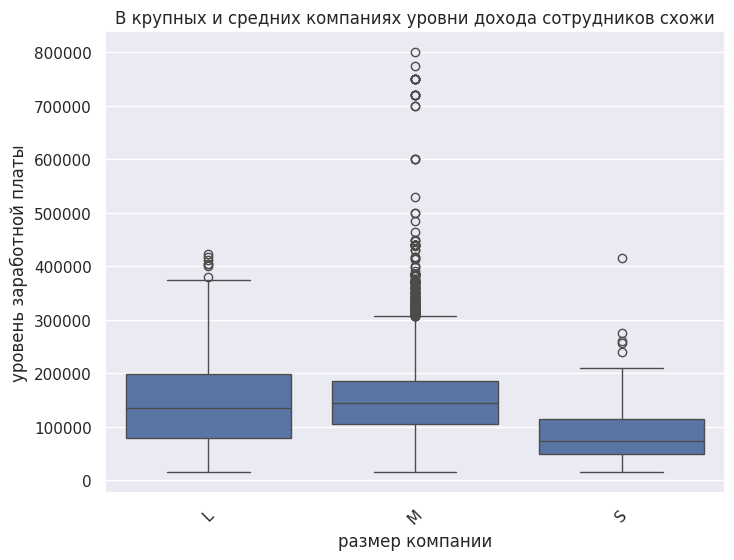

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('В крупных и средних компаниях уровни дохода сотрудников схожи')
plt.xlabel('размер компании')
plt.ylabel('уровень заработной платы')
plt.xticks(rotation=45)
plt.show()